In [26]:
# import numpy, astropy and matplotlib for basic functionalities
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import pkg_resources

# import agnpy classes
from agnpy.spectra import BrokenPowerLaw
from agnpy.fit import SynchrotronSelfComptonModel, load_gammapy_flux_points
from agnpy.utils.plot import load_mpl_rc, sed_y_label

load_mpl_rc()

# import gammapy classes
from gammapy.modeling.models import SkyModel
from gammapy.modeling import Fit

from scipy.constants import electron_mass as m_e, elementary_charge as e, speed_of_light as c
from math import pi


def vl(B):
    return (e*B)/(2*pi*m_e*c)

print(vl(0.1))

def vsp(d, z, g, vl):
    return (d/(1+z)) * ((g**2)*vl)

print(vsp(10, 0.5, 1000, vl(0.1)))


def vsscp(d, z, g, vl):
    return (d/(1+z)) * ((g**4)*vl)

print(vsscp(10, 0.5, 1000, vl(0.1)))


9.337289556608205
62248597.04405471
62248597044054.7


In [5]:
# electron energy distribution
n_e = BrokenPowerLaw(
    k=1e-8 * u.Unit("cm-3"),
    p1=2.02,
    p2=3.43,
    gamma_b=1000,   #1e5
    gamma_min=500,
    gamma_max=1e6,
)

# initialise the Gammapy SpectralModel
ssc_model = SynchrotronSelfComptonModel(n_e, backend="gammapy")

In [6]:
ssc_model.parameters["z"].value = 0.5 #0.0308
ssc_model.parameters["delta_D"].value = 10 #18 b=0.1   
ssc_model.parameters["t_var"].value = (1 * u.d).to_value("s") 
ssc_model.parameters["t_var"].frozen = True
ssc_model.parameters["log10_B"].value = -1 #-1.3

In [7]:
ssc_model.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str15,float64,str1,int64,float64,float64,bool,bool,str1
spectral,log10_k,-8.0000e+00,,0.000e+00,-1.000e+01,1.000e+01,False,False,
spectral,p1,2.0200e+00,,0.000e+00,1.000e+00,5.000e+00,False,False,
spectral,p2,3.4300e+00,,0.000e+00,1.000e+00,5.000e+00,False,False,
spectral,log10_gamma_b,3.0000e+00,,0.000e+00,2.000e+00,6.000e+00,False,False,
spectral,log10_gamma_min,2.6990e+00,,0.000e+00,0.000e+00,4.000e+00,True,False,
spectral,log10_gamma_max,6.0000e+00,,0.000e+00,4.000e+00,8.000e+00,True,False,
spectral,z,5.0000e-01,,0.000e+00,1.000e-03,1.000e+01,True,False,
spectral,delta_D,1.0000e+01,,0.000e+00,1.000e+00,1.000e+02,False,False,
spectral,log10_B,-1.0000e+00,,0.000e+00,-4.000e+00,2.000e+00,False,False,


In [8]:
ssc_model.spectral_parameters.to_table()


type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str15,float64,str1,int64,float64,float64,bool,bool,str1
spectral,log10_k,-8.0000e+00,,0.000e+00,-1.000e+01,1.000e+01,False,False,
spectral,p1,2.0200e+00,,0.000e+00,1.000e+00,5.000e+00,False,False,
spectral,p2,3.4300e+00,,0.000e+00,1.000e+00,5.000e+00,False,False,
spectral,log10_gamma_b,3.0000e+00,,0.000e+00,2.000e+00,6.000e+00,False,False,
spectral,log10_gamma_min,2.6990e+00,,0.000e+00,0.000e+00,4.000e+00,True,False,
spectral,log10_gamma_max,6.0000e+00,,0.000e+00,4.000e+00,8.000e+00,True,False,


In [9]:
ssc_model.emission_region_parameters.to_table()


type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str7,float64,str1,int64,float64,float64,bool,bool,str1
spectral,z,5.0000e-01,,0.000e+00,1.000e-03,1.000e+01,True,False,
spectral,delta_D,1.0000e+01,,0.000e+00,1.000e+00,1.000e+02,False,False,
spectral,log10_B,-1.0000e+00,,0.000e+00,-4.000e+00,2.000e+00,False,False,
spectral,t_var,8.6400e+04,s,0.000e+00,1.000e+01,3.142e+07,True,False,


In [10]:
sed_path = pkg_resources.resource_filename("agnpy", "data/mwl_seds/Mrk421_2011.ecsv")

systematics_dict = {
    "Fermi": 0.10,
    "GASP": 0.05,
    "GRT": 0.05,
    "MAGIC": 0.30,
    "MITSuME": 0.05,
    "Medicina": 0.05,
    "Metsahovi": 0.05,
    "NewMexicoSkies": 0.05,
    "Noto": 0.05,
    "OAGH": 0.05,
    "OVRO": 0.05,
    "RATAN": 0.05,
    "ROVOR": 0.05,
    "RXTE/PCA": 0.10,
    "SMA": 0.05,
    "Swift/BAT": 0.10,
    "Swift/UVOT": 0.05,
    "Swift/XRT": 0.10,
    "VLBA(BK150)": 0.05,
    "VLBA(BP143)": 0.05,
    "VLBA(MOJAVE)": 0.05,
    "VLBA_core(BP143)": 0.05,
    "VLBA_core(MOJAVE)": 0.05,
    "WIRO": 0.05,
}

# define minimum and maximum energy to be used in the fit
E_min = (1e11 * u.Hz).to("eV", equivalencies=u.spectral())
E_max = 100 * u.TeV

datasets = load_gammapy_flux_points(sed_path, E_min, E_max, systematics_dict)

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point 

In [11]:
sky_model = SkyModel(spectral_model=ssc_model, name="Mrk421")
datasets.models = [sky_model]

3.10603e-10 erg / (cm2 s)
721.6202494331533 eV


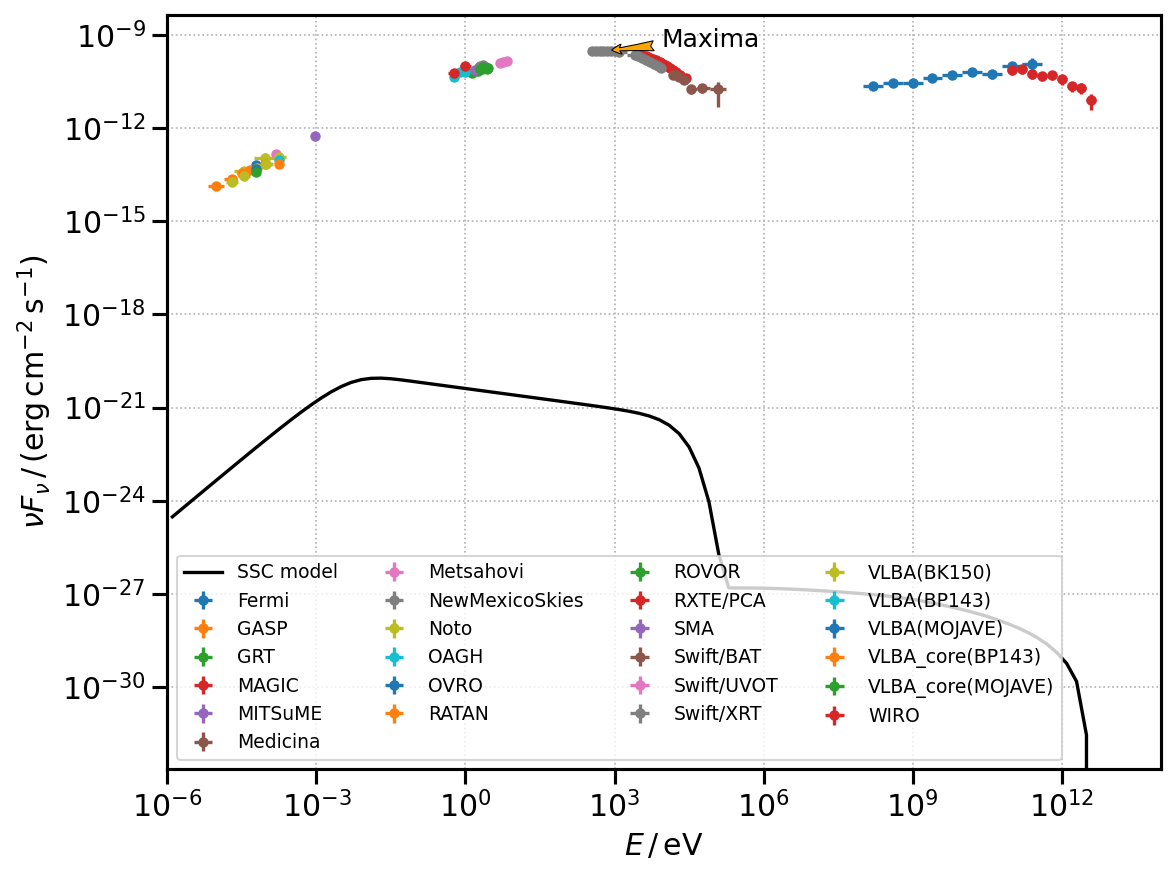

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

for dataset in datasets:
    dataset.data.plot(ax=ax, label=dataset.name)


xdata = list(np.concatenate([i.get_xdata() for i in ax.get_lines()]))


ydata = [i.get_ydata() for i in ax.get_lines()]


resultdata = list(np.concatenate(ydata))

maxval = max(resultdata)

print(maxval)

xval = xdata[resultdata.index(maxval)]
print(xval)


ssc_model.plot(
    ax=ax,
    energy_bounds=[1e-6, 1e14] * u.eV,
    energy_power=2,
    label="SSC model",
    color="k",
    lw=1.6,
)

ax.set_ylabel(sed_y_label)
ax.set_xlabel(r"$E\,/\,{\rm eV}$")
ax.set_xlim([1e-6, 1e14])
ax.legend(ncol=4, fontsize=9)

ax.annotate('Maxima', (xval, maxval), xytext=(9000, 4.10603e-10), arrowprops={'facecolor': 'orange', 'arrowstyle': 'fancy', 'linewidth': 0.5})

plt.show()

In [13]:
%%time
# define the fitter
fitter = Fit()
results = fitter.run(datasets)

CPU times: user 4min 20s, sys: 1min 2s, total: 5min 22s
Wall time: 5min 23s


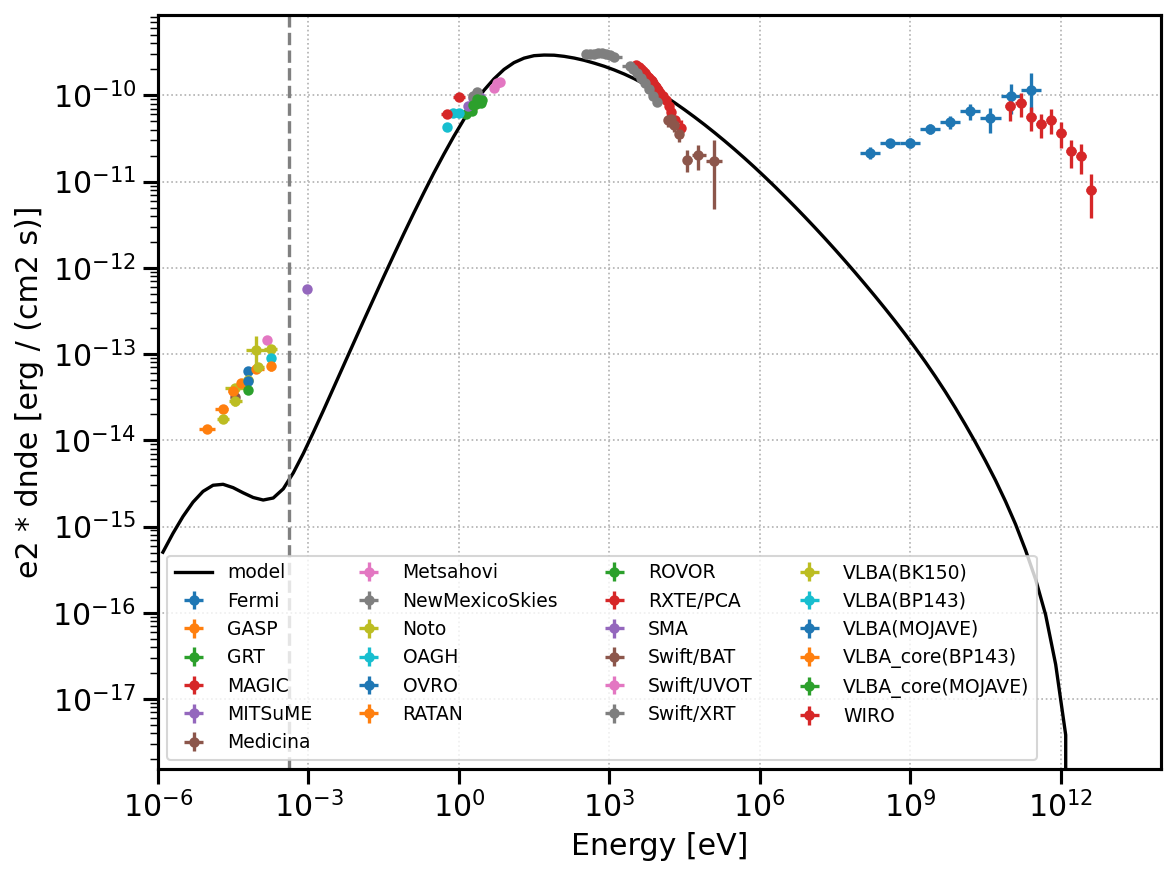

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

for dataset in datasets:
    dataset.data.plot(ax=ax, label=dataset.name)

ssc_model.plot(
    ax=ax,
    energy_bounds=[1e-6, 1e14] * u.eV,
    energy_power=2,
    label="model",
    color="k",
    lw=1.6,
)

# plot a line marking the minimum energy considered in the fit
ax.axvline(E_min, ls="--", color="gray")

plt.legend(ncol=4, fontsize=9)
plt.xlim([1e-6, 1e14])
plt.show()

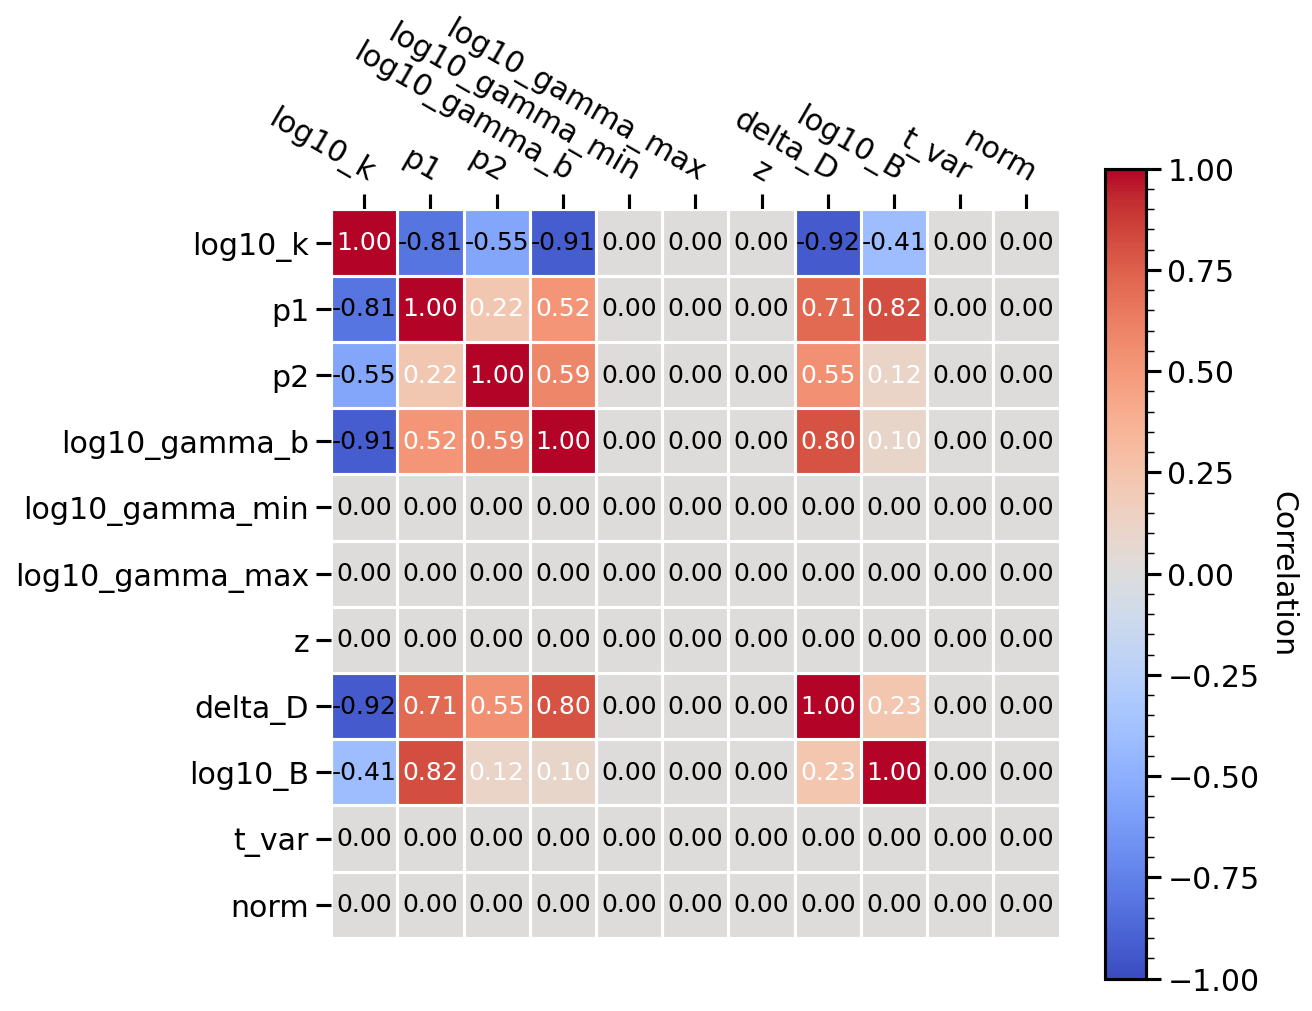

In [15]:
# plot the covariance matrix
ssc_model.covariance.plot_correlation()
plt.grid(False)
plt.show()

log10_k
{'Mrk421.spectral.log10_k_scan': array([0.03922952, 0.05124008, 0.06325063, 0.07526119, 0.08727174,
       0.0992823 , 0.11129285, 0.12330341, 0.13531397, 0.14732452,
       0.15933508, 0.17134563, 0.18335619, 0.19536674, 0.2073773 ,
       0.21938785, 0.23139841, 0.24340897, 0.25541952, 0.26743008,
       0.27944063, 0.29145119, 0.30346174, 0.3154723 , 0.32748285,
       0.33949341, 0.35150397, 0.36351452, 0.37552508, 0.38753563,
       0.39954619, 0.41155674, 0.4235673 , 0.43557785, 0.44758841,
       0.45959897, 0.47160952, 0.48362008, 0.49563063, 0.50764119,
       0.51965174, 0.5316623 , 0.54367285, 0.55568341, 0.56769397,
       0.57970452, 0.59171508, 0.60372563, 0.61573619, 0.62774674]), 'stat_scan': array([ 7602.47626306,  7361.56534488,  7112.24357792,  6854.65135642,
        6589.00942993,  6315.63193852,  6034.94117935,  5747.48431909,
        5453.95229221,  5155.20115382,  4852.27618828,  4546.43911035,
        4239.19873636,  3932.34554748,  3627.99061778,  3328.

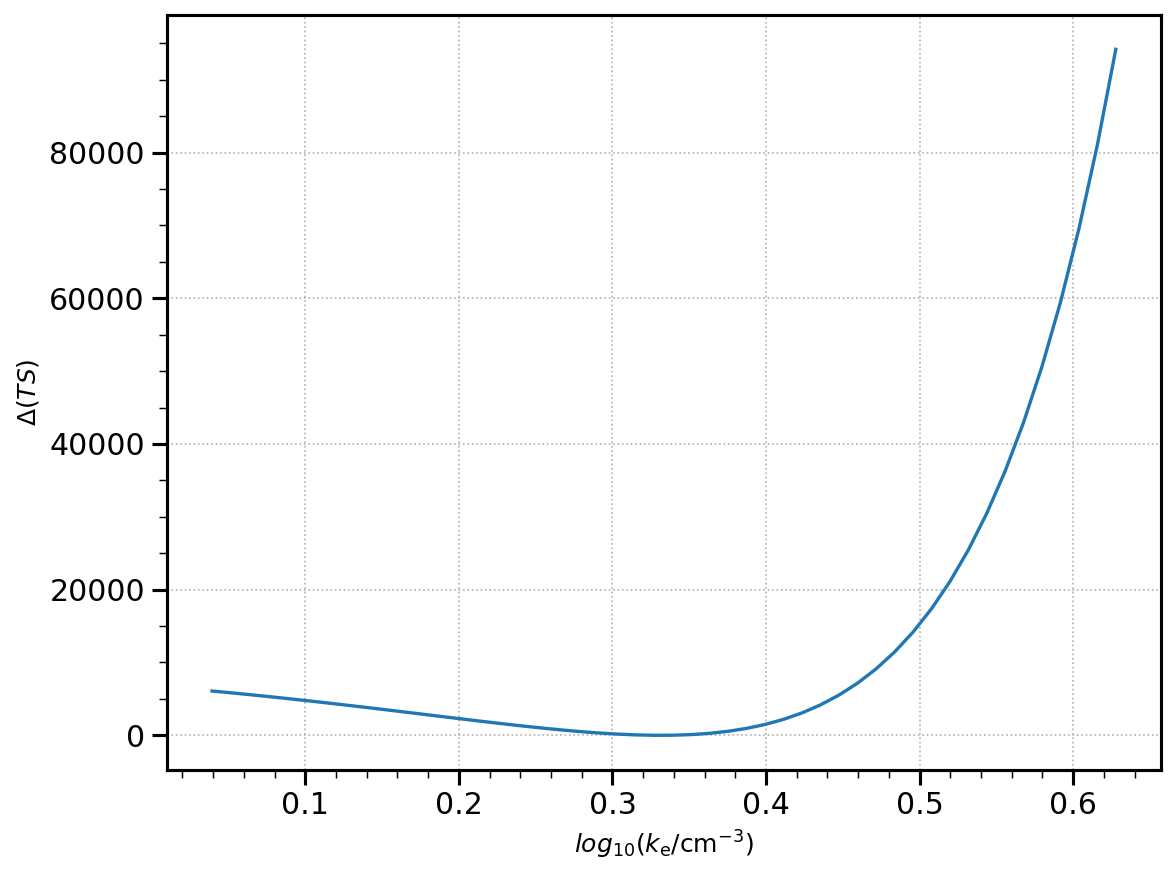

CPU times: user 14.1 s, sys: 3.53 s, total: 17.7 s
Wall time: 17.2 s


In [16]:
%%time
# plot the profile for the normalisation of the electron energy distribution
par = sky_model.spectral_model.log10_k
par.scan_n_values = 50
profile = fitter.stat_profile(datasets=datasets, parameter=par)

print(par.name)

print(profile)

# to compute the delta TS
total_stat = results.total_stat
plt.plot(profile[f"Mrk421.spectral.{par.name}_scan"], profile["stat_scan"] - total_stat) # profile["log10_k_scan"]
plt.ylabel(r"$\Delta(TS)$", size=12)
plt.xlabel(r"$log_{10}(k_{\rm e} / {\rm cm}^{-3})$", size=12)
plt.show()